In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import collections

%matplotlib inline

In [5]:
coords = {}
ds_ordered = []
ds_ordered_val = []
with open('/content/ex1data1.txt', 'r') as dataset:
  ds = dataset.read().replace('\n',',').split(',')
  ds_training = ds[:-16]
  ds_validating = ds[-16::]

In [6]:
print(len(ds_training))

for elem in ds_training[::2]:
  coords[float(elem)] = float(ds_training[ds_training.index(elem)+1])
for key in sorted(coords):
  ds_ordered.append([key, coords[key]])
coords.clear()

for elem in ds_validating[::2]:
  coords[float(elem)] = float(ds_validating[ds_validating.index(elem)+1])
for key in sorted(coords):
  ds_ordered_val.append([key, coords[key]])
print(ds_ordered_val)

x = [elem[0] for elem in ds_ordered] 
y = [elem[1] for elem in ds_ordered] 
x_val = [elem[0] for elem in ds_ordered_val]
y_val = [elem[1] for elem in ds_ordered_val]
m = len(y)
m_val = len(y_val)
theta_begin = np.zeros(2)


178
[[5.0594, 2.8214], [5.3054, 1.9869], [5.4369, 0.61705], [5.7077, 1.8451], [5.8707, 7.2029], [7.6366, 4.2959], [8.2934, 0.14454], [13.394, 9.0551]]


In [7]:
def plot(x_ax, y_ax, arg, legend):
  fig = plt.figure()
  plt.plot(x_ax, y_ax, arg, ms=10, mec='k')
  plt.ylabel(legend[0])
  plt.xlabel(legend[1])   
  plt.show()

In [8]:
X = np.stack([np.ones(m), x], axis=1)
print(X)

[[ 1.      5.0269]
 [ 1.      5.0365]
 [ 1.      5.0546]
 [ 1.      5.0702]
 [ 1.      5.1077]
 [ 1.      5.1301]
 [ 1.      5.1793]
 [ 1.      5.1884]
 [ 1.      5.2524]
 [ 1.      5.3077]
 [ 1.      5.3794]
 [ 1.      5.4069]
 [ 1.      5.4901]
 [ 1.      5.4994]
 [ 1.      5.5204]
 [ 1.      5.5277]
 [ 1.      5.5416]
 [ 1.      5.5649]
 [ 1.      5.6063]
 [ 1.      5.6397]
 [ 1.      5.6407]
 [ 1.      5.7107]
 [ 1.      5.7292]
 [ 1.      5.734 ]
 [ 1.      5.7737]
 [ 1.      5.8014]
 [ 1.      5.8598]
 [ 1.      5.8918]
 [ 1.      6.002 ]
 [ 1.      6.0062]
 [ 1.      6.1101]
 [ 1.      6.1891]
 [ 1.      6.2742]
 [ 1.      6.3261]
 [ 1.      6.3328]
 [ 1.      6.3534]
 [ 1.      6.3557]
 [ 1.      6.3589]
 [ 1.      6.3654]
 [ 1.      6.4296]
 [ 1.      6.4862]
 [ 1.      6.5159]
 [ 1.      6.5479]
 [ 1.      6.5894]
 [ 1.      6.8825]
 [ 1.      7.0032]
 [ 1.      7.0708]
 [ 1.      7.0931]
 [ 1.      7.2182]
 [ 1.      7.2259]
 [ 1.      7.3345]
 [ 1.      7.4239]
 [ 1.      7

In [9]:
def cost(x_ax, y_ax, theta):
  j = 0
  j = 1/(2*m)*np.sum(np.square(np.dot(x_ax, theta) - y_ax))
  return j

Final theta =  [-3.64920394  1.18043187]


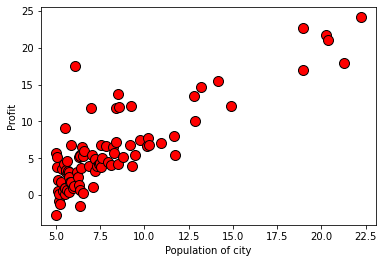

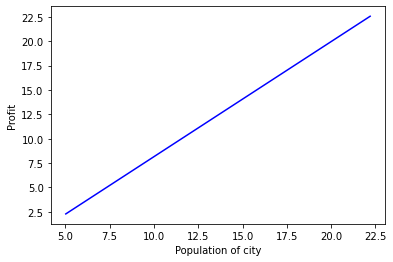

In [10]:
def gradient(x_ax, y_ax, theta, alpha, iterations):
  theta = theta_begin.copy()
  j_his = []
  for i in range(iterations):
    theta = theta - alpha / m * (np.dot(x_ax, theta) - y_ax).dot(x_ax)
    j_his.append(cost(x_ax, y_ax, theta))
  return j_his, theta

cost(X, y, theta_begin)
J_history, theta_end = gradient(X ,y, theta_begin, 0.01, 1500)
print('Final theta = ', theta_end)

plot(x, y, 'ro', ['Profit', 'Population of city'])
plot(x, np.dot(X, theta_end), 'b-', ['Profit', 'Population of city'])

In [11]:
def validator(x_ax, y_ax, theta):
  X_val = np.stack([np.ones(m_val), x_val], axis=1)
  y_end = np.dot(X_val,theta)
  for i in range(m_val):
    print('x = ', x_ax[i], 'y = ', y_end[i], 'estimated y = ', y_ax[i])

validator(x_val, y_val, theta_end)

x =  5.0594 y =  2.323073034752291 estimated y =  2.8214
x =  5.3054 y =  2.6134592736218214 estimated y =  1.9869
x =  5.4369 y =  2.768686063911835 estimated y =  0.61705
x =  5.7077 y =  3.088347013041384 estimated y =  1.8451
x =  5.8707 y =  3.2807574070890815 estimated y =  7.2029
x =  7.6366 y =  5.365282038063489 estimated y =  4.2959
x =  8.2934 y =  6.140589687207829 estimated y =  0.14454
x =  13.394 y =  12.16150045947583 estimated y =  9.0551
